In [1]:
# @ Marcelo Goncalves
# In this project I will provided with multiple instances of orthopedic parameters and we are also provided with their classification as Normal or Abnormal
# so for that I will use the data called ortho_knnnb that contain values of normal and abnormal orthopedic paramenters. 
# In this project i will the KNN lgorithms. this is algorithms that use technique to available data and classifies a new data point based on the similarity.

In [2]:
# import all packages needed 

In [24]:
pip install matplotlib --force-reinstall

  Using cached matplotlib-3.3.4-cp38-cp38-win_amd64.whl (8.5 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-win_amd64.whl (51 kB)
  Using cached Pillow-8.1.2-cp38-cp38-win_amd64.whl (2.2 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\marce\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [32]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in c:\users\marce\anaconda3\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

NameError: name 'sns' is not defined

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Section I : Accessing the Data

Make a pandas DataFrame from the CSV

In [3]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\KNN\\ortho_knnnb.csv")

In [4]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


How many variables does the dataset contain?

In [5]:
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [6]:
# we have 7 variable in our dataset. 
# pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
# 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class

What is the data about?

In [7]:
# the data is about an orthopedic parameters. they are classificate in normal and abnormal. 

What are we trying to predict here?

In [8]:
# the ideia is to use the K Nearest Neighbour, to predict if the new parameters are normal or abnormal basing on the similarity.

## Section II : Exploratory Data Analysis

Perform some descriptive statistics and make a note of your findings

In [9]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [10]:
#Constructing correlation Matrix
corr = data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


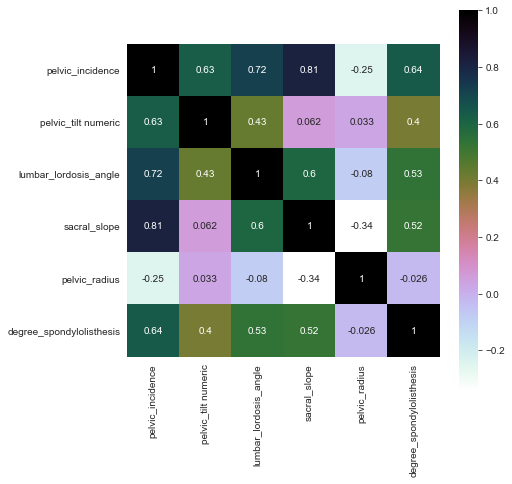

In [58]:
#heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

=================================================================

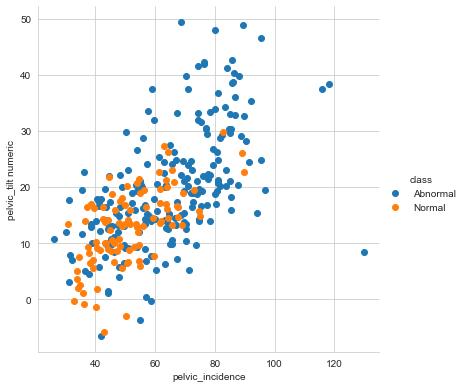

In [12]:

# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_tilt numeric") \
   .add_legend();
plt.show();


In [13]:
==============================================================================

SyntaxError: invalid syntax (<ipython-input-13-7c03a521c07e>, line 1)

In [ ]:

# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=5.5) \
   .map(plt.scatter, "sacral_slope", "lumbar_lordosis_angle") \
   .add_legend();
plt.show();


In [ ]:
# sacral_slope from lumbar_lordosis_angle is harder to distinguish because they have  some values or abnormal and normal overlap.

=========================================================================================================

In [ ]:

# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=5.5) \
   .map(plt.scatter, "degree_spondylolisthesis", "pelvic_radius") \
   .add_legend();
plt.show();

==========================================================================================

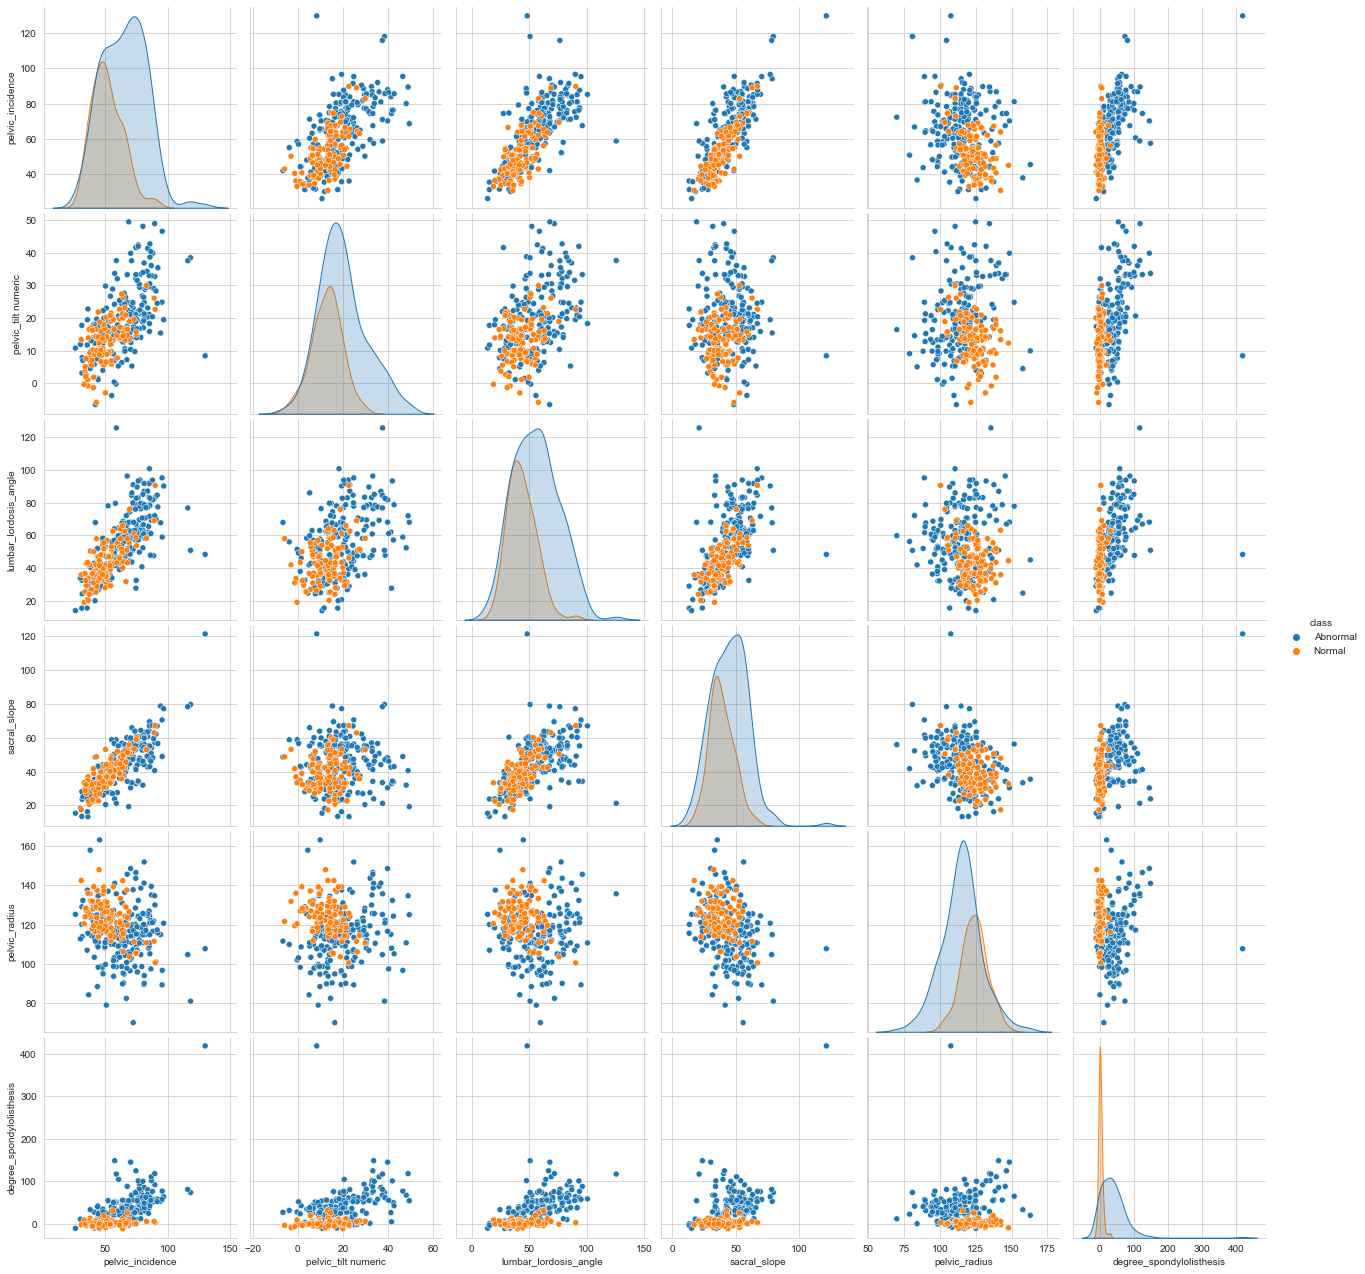

In [14]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="class", size=3);
plt.show()

Point out any observations and comment on the strength of the relationships if any.

## Section III : Prepare data for Training!

Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column

In [15]:
# create new column
data['symptom_class'] = data['class'].map({'Abnormal':1, 'Normal':0})

In [16]:
data.drop('class',
  axis=1, inplace=True)


In [17]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


Split the entire dataset into independent features and symptoms as the response variable

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

In [19]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class']

In [20]:
train_x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
132,69.626283,21.122751,52.766595,48.503532,116.803091,54.816867
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629
62,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575
...,...,...,...,...,...,...
203,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787
255,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206
72,84.974132,33.021175,60.859873,51.952957,125.659534,74.333409
235,63.929470,19.971097,40.177050,43.958373,113.065939,-11.058179


In [21]:
test_x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537
120,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327
...,...,...,...,...,...,...
146,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250
16,63.834982,20.362507,54.552434,43.472475,112.309492,-0.622527


In [22]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


Normalize the variables.

In [23]:
# Normalization is a process that we use to put the variable to be between 0 and 1. I will normalise just my
# independent  variable 

In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
#scaler=Normalizer().fit(data)
#normalizeData=scaler.transform(data)
#normalizeData=pd.DataFrame(normalizeData,index=data.index,columns=data.columns)
#print(normalizeData)

In [26]:
# question.. you should do the normalization for entire data or just for your independent variable?

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform( train_x )
test_x = scaler.transform(test_x)

## Section IV : Training with KNN

Use train_test_split from sklearn and split the parameters and classes into train and test sets

In [28]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class']

Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.

In [29]:

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y) 

KNeighborsClassifier(n_neighbors=3)

In [30]:
# Predict symptom_class for test data
pred = KNN.predict(test_x)
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.


In [32]:
KNN = KNeighborsClassifier(n_neighbors=30)
KNN.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=30)

In [33]:
pred = KNN.predict(test_x)
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 80.65%


In [35]:
# Nota. I tried to increasing my K into 4,5,6,7,8,9,10... 20...30
# and the acuracy of the KNN model is steail in 79% to 85% 

Evaluate your final model using appropriate metrics for classification and comment on them.


In [36]:
# let's evaluate the KNN model
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print (confusion_matrix(test_y ,pred))

[[15  5]
 [ 7 35]]


In [38]:
# as we can see in the matrix. the prediction agree in 15 and 35 and desagree in 5 and 7 

In [39]:
print (classification_report(test_y ,pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.88      0.83      0.85        42

    accuracy                           0.81        62
   macro avg       0.78      0.79      0.78        62
weighted avg       0.81      0.81      0.81        62



In [40]:
# chossing my k value and try to pick up a good k value for train and test acuracy
train_accuracy = []
test_accuracy = []

for k in range(1,20):                                 # K from 1 to 19
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)
#######################################################################################
    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_pred,train_y)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_pred,test_y)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("the Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

the Best accuracy is 0.8548387096774194 with K = 1


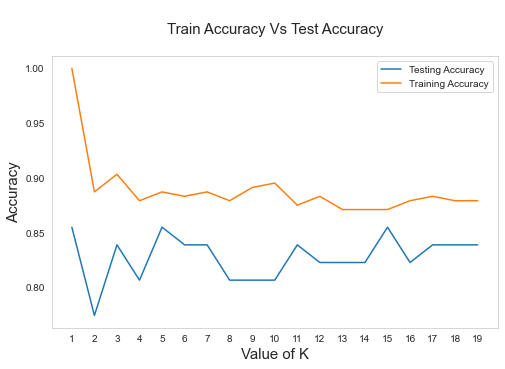

In [41]:

#Accuracy Plot
plt.figure(figsize=[8,5])
plt.plot(range(1,20), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,20), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,20))
plt.grid()
plt.show()

In [42]:
# As we can see in the graf of Accuracy and K value, the training accuraracy is decressing and stabilizes in 88 % approximately
# and for training accuracy, it's get the peak at 87 approximately and decressing oscillating between 85% and 80%

In [43]:
# using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,20,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [44]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [45]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 17}
Best score: 0.8587755102040816


In [46]:

#Using best hyperparameter

knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 17 is 83.87%


In [47]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["symptom_class"] = y_pred
test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,1
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,1
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,1
...,...,...,...,...,...,...,...
57,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,1
58,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1
59,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,1
60,63.834982,20.362507,54.552434,43.472475,112.309492,-0.622527,0


=============================================================================================================================
============================================================================================================================

In [48]:
# Now I will use the same information to train my data using different machine learning algorithm. Naive Bayes
# this algorithm is used to text classification that includes a high-dimensional training dataset

## Section V : Training with Naive Bayes


Now , fit a Naive Bayes Classifier to the same data.


In [49]:
## Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()


Train a NB model with default arguments and make a note of training and test metrics


In [50]:
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [51]:
#Predicting the Test set results
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1]


In [52]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class,pred_species
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,1,1
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,1
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,1,1
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1,1
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,1,1


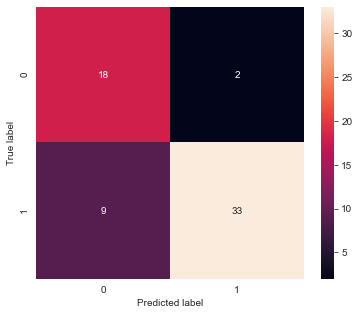

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# as we can see for the Confusion Matrix, we have 18 true positive and 2 true negative. that's mean, we predict just 2 value 
# as 0 and it become 1, which is not bad.  for the one we predict 33 correct and 9 wrong. if we see in term of percentage,
# for 0 and for 1 the prediction is more than 80% which is not bad for the model. 

In [54]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


In [55]:
#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 82.26%


In [56]:

#predicted_probabilities
nvclassifier.predict_proba(test_x)[:10]

array([[2.30544189e-05, 9.99976946e-01],
       [4.56381618e-01, 5.43618382e-01],
       [5.88570384e-17, 1.00000000e+00],
       [7.90472863e-05, 9.99920953e-01],
       [3.94244355e-06, 9.99996058e-01],
       [2.79949544e-04, 9.99720050e-01],
       [9.92581878e-01, 7.41812234e-03],
       [6.69383180e-17, 1.00000000e+00],
       [1.21419008e-26, 1.00000000e+00],
       [2.56897665e-02, 9.74310233e-01]])

What are your inferences on the relative performance between the KNN and NB based models?


In [57]:
# By using the Naive Bayes algoritham I get for accuracy : 82.26% and for the KNN algoritham
# The accuracy was 85%. so looking at the accuracy of the result for this dataset I call tell that
# the KNN model is better to predict if  the data is normal and abnormal. 

Which of these models would you recommend and with what reasons ?


In [ ]:
# I whould like to recoment for this dataset a KNN model because as the result show us,
# this model apear to have better accuracy.